In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [197]:
df = pd.read_excel('the data.xlsx',index_col='DATE')
#df.index.freq='MS'

In [198]:
df.head()

,HR,SWT,SWD,SWS,R,Dst,F10.7
DATE,,,,,,,
2020-01-01,0.0,22067.0,10.0,295.0,6.0,-6.0,69.4
2020-01-01,1.0,30130.0,7.8,299.0,6.0,-1.0,69.4
2020-01-01,2.0,39156.0,8.3,300.0,6.0,3.0,69.4
2020-01-01,3.0,25524.0,5.5,298.0,6.0,5.0,69.4
2020-01-01,4.0,30304.0,7.6,302.0,6.0,7.0,69.4


In [199]:
df_2=pd.DataFrame(df.SWT)

In [200]:
df_2

,SWT
DATE,
2020-01-01,22067.0
2020-01-01,30130.0
2020-01-01,39156.0
2020-01-01,25524.0
2020-01-01,30304.0
...,...
2022-09-13,41046.0
2022-09-13,53697.0
2022-09-13,58395.0


<AxesSubplot:xlabel='DATE'>

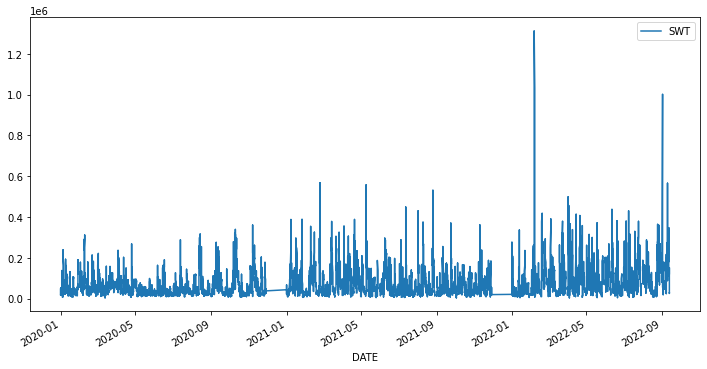

In [201]:
df_2.plot(figsize=(12,6))

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose

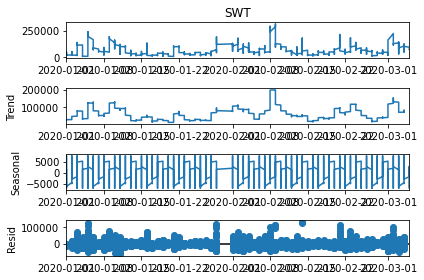

In [203]:
df_2=df_2.iloc[0:1500,:]
results = seasonal_decompose(df_2['SWT'],period=30)
results.plot();

In [204]:
df_2=df_2.iloc[0:1500,:]
df_2

,SWT
DATE,
2020-01-01,22067.0
2020-01-01,30130.0
2020-01-01,39156.0
2020-01-01,25524.0
2020-01-01,30304.0
...,...
2020-03-05,77715.0
2020-03-05,78087.0
2020-03-05,74429.0


In [205]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_2, test_size= 0.30 , random_state=42)

In [206]:
#train = df_2.iloc[:1000]
#test = df_2.iloc[1000:]

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_2.head(),df_2.tail()



(                SWT
 DATE               
 2020-01-01  22067.0
 2020-01-01  30130.0
 2020-01-01  39156.0
 2020-01-01  25524.0
 2020-01-01  30304.0,
                 SWT
 DATE               
 2020-03-05  77715.0
 2020-03-05  78087.0
 2020-03-05  74429.0
 2020-03-05  77759.0
 2020-03-05  71566.0)

In [208]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [209]:
scaled_train[:10]

array([[0.01421011],
       [0.11781277],
       [0.26373677],
       [1.        ],
       [0.2324239 ],
       [0.03216422],
       [0.12754585],
       [0.02874236],
       [0.11180724],
       [0.19785353]])

In [210]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [211]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [212]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01421011 0.11781277 0.26373677]
Predict this y: 
 [[1.]]


In [213]:
X.shape

(1, 3, 1)

In [214]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [215]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [216]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [217]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [218]:
# fit model
model.fit(generator,epochs=25)

Epoch 1/25
1038/1038 [==============================] - 6s 4ms/step - loss: 0.0226
Epoch 2/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0216
Epoch 3/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0214
Epoch 4/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0214
Epoch 5/25
1038/1038 [==============================] - 5s 4ms/step - loss: 0.0213
Epoch 6/25
1038/1038 [==============================] - 5s 4ms/step - loss: 0.0214
Epoch 7/25
1038/1038 [==============================] - 5s 4ms/step - loss: 0.0213
Epoch 8/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0212
Epoch 9/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0213
Epoch 10/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0214
Epoch 11/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0211
Epoch 12/25
1038/1038 [==============================] - 4s 4ms/step - loss: 0.0212
E

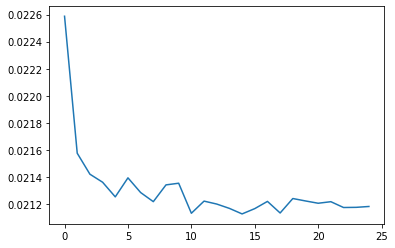

In [219]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [220]:
last_train_batch = scaled_train[-12:]

In [221]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [222]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 148ms/step


array([[0.18229505]], dtype=float32)

In [223]:
scaled_test[0]

array([0.09479653])

In [224]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [225]:
test_predictions

[array([0.18229505], dtype=float32),
 array([0.18267496], dtype=float32),
 array([0.18294263], dtype=float32),
 array([0.18306504], dtype=float32),
 array([0.18313219], dtype=float32),
 array([0.18314986], dtype=float32),
 array([0.18316297], dtype=float32),
 array([0.18316938], dtype=float32),
 array([0.18317223], dtype=float32),
 array([0.18317372], dtype=float32),
 array([0.18317439], dtype=float32),
 array([0.18317479], dtype=float32),
 array([0.18317476], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 array([0.18317477], dtype=float32),
 

In [226]:
test.head()

,SWT
DATE,
2020-02-18,36389.0
2020-02-29,37782.0
2020-01-18,20182.0
2020-01-18,26748.0
2020-01-19,10950.0


In [227]:
true_predictions = scaler.inverse_transform(test_predictions)

In [228]:
test['Predictions'] = true_predictions

C:\Users\Mcs\AppData\Local\Temp/ipykernel_15340/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='DATE'>

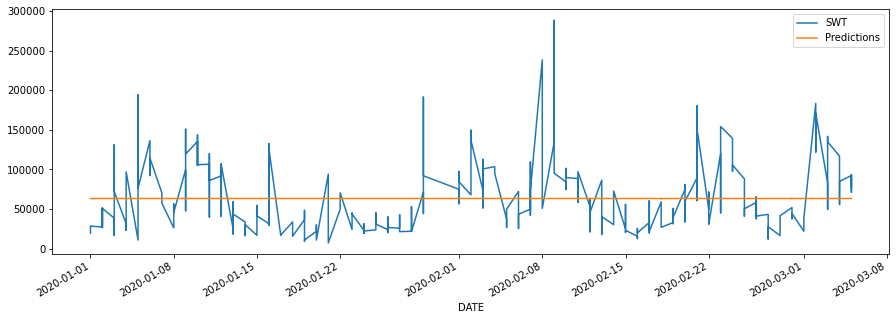

In [233]:
test.plot(figsize=(15,5))

In [230]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['SWT'],test['Predictions']))
print(rmse)

41928.572597643244
